## Core Concept
### Scalar, Vector and Matrix


#### Scalar
- A single number (0D)
- Basic unit of computation

#### Vector
- A 1D array of numbers
- Represents a single data point, or parameters of a model
- Feature vector: [height, weight, age] — one person’s data

#### Matrix
- A 2D array (rows × columns)
- Represents multiple vectors — e.g., a dataset or model parameters

| Concept | Structure     | ML Example                             | Role                              |
| ------- | ------------- | -------------------------------------- | --------------------------------- |
| Scalar  | Single number | Loss value: `0.01`                     | Output, score, cost               |
| Vector  | 1D array      | Feature vector: `[5.1, 3.5, 1.4, 0.2]` | One data point                    |
| Matrix  | 2D array      | Dataset: many rows of vectors          | Batch of data or model parameters |


In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1: NumPy

In [ ]:
# 1D Array (Vector) - Represents a single feature or label
feature_vector = np.array([5.1, 3.5, 1.4, 0.2, 5.0])


print(f"Shape: {feature_vector.shape}") # (5,) -> 5 elements, 1 dimension

# 2D Array (Matrix) - Represents a full dataset (N samples x M features)
data_matrix = np.array([[10, 20.0, 30],
                        [40, 50, 60]])

print(f"Shape: {data_matrix.shape}")

Shape: (2, 3)


In [ ]:
data_matrix[0,1]

np.int64(20)

In [ ]:
# The HUGE advantage of NumPy: Vectorization
large_array = np.random.rand(1000000)
python_list = large_array.tolist()

# NumPy Vectorized Operation
np_time = timeit.timeit("large_array * 2", globals={'large_array': large_array}, number=10)

# Python List Loop
def list_op(data):
    return [x * 2 for x in data]
list_time = timeit.timeit("list_op(python_list)", globals={'list_op': list_op, 'python_list': python_list}, number=10)

print(f"\nNumPy Vectorized Time: {np_time:.5f} seconds")
print(f"Python List Loop Time: {list_time:.5f} seconds")
print(f"NumPy is {list_time / np_time:.0f}x faster! (approx.)")


NumPy Vectorized Time: 0.02268 seconds
Python List Loop Time: 0.78793 seconds
NumPy is 35x faster! (approx.)


In [ ]:
# Dot Product - Foundation of Linear Regression and Neural Networks
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
dot_product = np.dot(v1, v2)
# Result: (1*4) + (2*5) + (3*6) = 4 + 10 + 18 = 32
print(f"\nDot Product (v1 • v2): {dot_product}")


Dot Product (v1 • v2): 32


In [ ]:
v1/2

array([0.5, 1. , 1.5])

In [ ]:
matrix1 = np.array([[10, 20, 30],
                        [40, 50, 60]])
matrix2 = np.array([[2, 4, 5],
                        [2, 8, 1]])

mm = np.dot(matrix1, matrix2.T)
print(mm)

[[250 210]
 [580 540]]


In [ ]:
np.random.rand(3,3,3)

array([[[0.87299454, 0.01672465, 0.11945606],
        [0.76267262, 0.6393505 , 0.74215872],
        [0.52133718, 0.48597416, 0.99587305]],

       [[0.29224785, 0.67491211, 0.2163259 ],
        [0.72210816, 0.24544407, 0.2978413 ],
        [0.59425832, 0.90196044, 0.48600057]],

       [[0.05506157, 0.06981131, 0.9513153 ],
        [0.80513603, 0.31888396, 0.99583919],
        [0.2018081 , 0.09953941, 0.93077715]]])

In [ ]:
matrix2.T

array([[2, 2],
       [4, 8],
       [5, 1]])

### Section 2: Pandas

In [ ]:
# Loading a dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df_raw = iris.frame

#### Data Inspection

In [ ]:
df = df_raw.copy()

# df.head()
# df.info()
df.describe()
# df.shape
# len(df.columns)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Selection and Filtering

In [ ]:
# Select a single column (returns a Pandas Series)
# sepal_length = df['sepal length (cm)']
# print(sepal_length.to_list())


# Filter: rows where sepal length is greater than 6.0
# large_sepals = df.loc[df['sepal length (cm)'] > 6.0]
# print(large_sepals.head(3))

# setosas = df[df['target'] == 1]
# print(setosas.head())

# Select rows 0 to 4, and columns 0 to 2
subset = df.iloc[0:5, 0:3]
print(subset)

   sepal length (cm)  sepal width (cm)  petal length (cm)
0                5.1               3.5                1.4
1                4.9               3.0                1.4
2                4.7               3.2                1.3
3                4.6               3.1                1.5
4                5.0               3.6                1.4


#### Sorting and Ranking

In [ ]:
# Ascending Order
# df.sort_values(by='sepal width (cm)')

# Descending Order
df.sort_values(by='sepal length (cm)', ascending=False)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
131,7.9,3.8,6.4,2.0,2
122,7.7,2.8,6.7,2.0,2
118,7.7,2.6,6.9,2.3,2
117,7.7,3.8,6.7,2.2,2
135,7.7,3.0,6.1,2.3,2
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,0
42,4.4,3.2,1.3,0.2,0
8,4.4,2.9,1.4,0.2,0
38,4.4,3.0,1.3,0.2,0


#### Aggregations and Grouping

In [ ]:
df.groupby('target').mean()

# df.groupby('target').agg(['mean', 'std'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


#### Value Counts and Distributions

<Axes: >

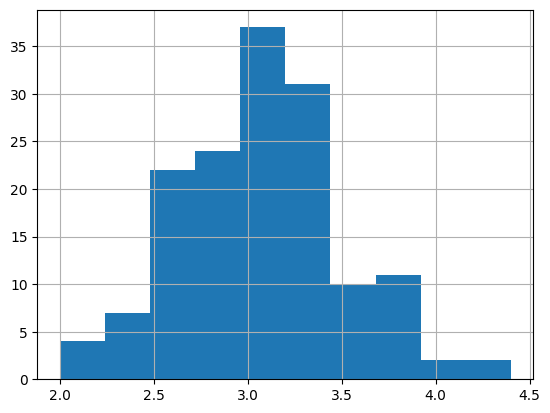

In [ ]:
# df['target'].value_counts()

df['sepal width (cm)'].hist()

#### Creating or Modifying Columns

In [ ]:
df['sepal_ratio'] = df['sepal length (cm)'] / df['sepal width (cm)']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_ratio
0,5.1,3.5,1.4,0.2,0,1.457143
1,4.9,3.0,1.4,0.2,0,1.633333
2,4.7,3.2,1.3,0.2,0,1.468750
3,4.6,3.1,1.5,0.2,0,1.483871
4,5.0,3.6,1.4,0.2,0,1.388889


#### Cleaning / Handling Missing Data

In [ ]:
df.isnull().sum()
# df.dropna()
# df.fillna(df.mean())

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
sepal_ratio,0


#### Encoding & Mapping

In [ ]:
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_ratio,species
145,6.7,3.0,5.2,2.3,2,2.233333,virginica
146,6.3,2.5,5.0,1.9,2,2.520000,virginica
147,6.5,3.0,5.2,2.0,2,2.166667,virginica
148,6.2,3.4,5.4,2.3,2,1.823529,virginica
149,5.9,3.0,5.1,1.8,2,1.966667,virginica


In [ ]:
df['species_encoded'] = df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_ratio,species,species_encoded
0,5.1,3.5,1.4,0.2,0,1.457143,setosa,0
1,4.9,3.0,1.4,0.2,0,1.633333,setosa,0
2,4.7,3.2,1.3,0.2,0,1.468750,setosa,0
3,4.6,3.1,1.5,0.2,0,1.483871,setosa,0
4,5.0,3.6,1.4,0.2,0,1.388889,setosa,0


#### Crosstab

In [ ]:
pd.crosstab(df['species'], df['sepal length (cm)'] > 5.0)


sepal length (cm),False,True
species,,
setosa,28,22
versicolor,3,47
virginica,1,49


### Visualizations

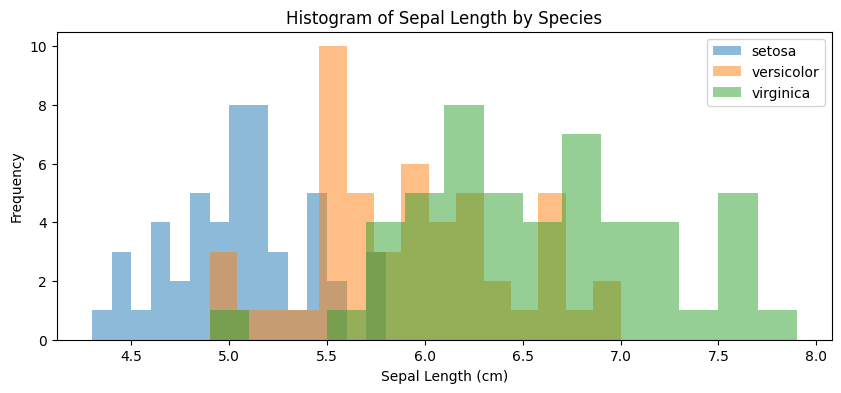

In [ ]:
# Histogram of Sepal Length for each species
plt.figure(figsize=(10, 4))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal length (cm)'], alpha=0.5, bins=15, label=species)

plt.title('Histogram of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

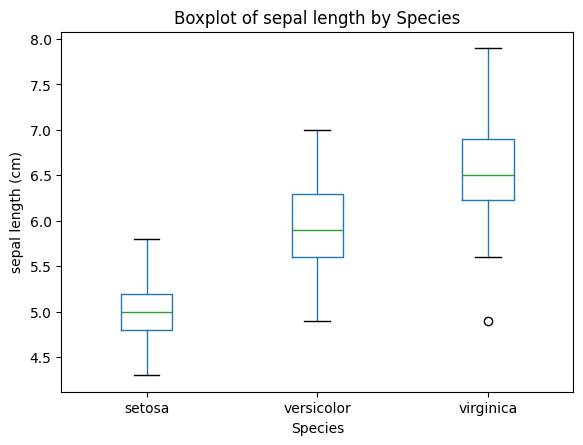

In [ ]:
# Boxplot of Petal Width grouped by Species
plt.figure(figsize=(8, 5))
df.boxplot(column='sepal length (cm)', by='species', grid=False)
plt.title('Boxplot of sepal length by Species')
plt.suptitle('')  # Suppress default title
plt.xlabel('Species')
plt.ylabel('sepal length (cm)')
plt.show()

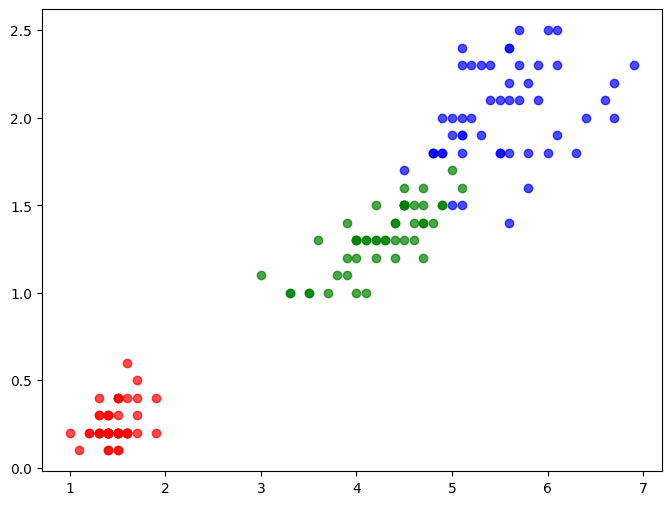

In [ ]:
# Scatter plot of Petal Length vs Petal Width colored by Species
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
plt.figure(figsize=(8, 6))
for species, color in colors.items():
    subset = df[df['species'] == species]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'],
                label=species, color=color, alpha=0.7)